In [1]:
%matplotlib inline
import simple_simulation
import numpy as np
import matplotlib.pyplot as plt
import cosmology

0.048252


In [2]:
sMin=20.#janskies
catalog=simple_simulation.drawRandomSources(sMin)
print len(catalog)
#catalog[:,2]=1.
#catalog[:,3]=0.
simulationDefault=simple_simulation.HexDishArray(nSide=9,dAnt=2.,dAntPos=3.,nDays=1)
simulationDefault.setSourceList(catalog)
simulationDefault.gridDays()
kperp_c,kpara_c,cubeGrid=simulationDefault.getCosmologyDCubeGrid()
kperp_dt,kpara_dt,cubeDGrid=simulationDefault.getCosmologyDVisGrid()
imgUniform=simulationDefault.getUniformWeightedImage()[100]

number of sources=90
90


simple_simulation.py:252: RuntimeWarning: invalid value encountered in divide
  ftTemp=self.dataCube*windowCube/self.sampleCube
simple_simulation.py:80: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  counts[binNum]+=1
simple_simulation.py:81: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  dGrid[:,binNum]+=np.abs(ftVis[nt/2:,uNum])**2.
simple_simulation.py:82: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  dGrid[:,binNum]+=np.abs(np.flipud(ftVis[:nt/2,uNum]))**2.
simple_simulation.py:288: RuntimeWarning: invalid value encountered in divide
  tempRatio=self.dataCube/self.sampleCube


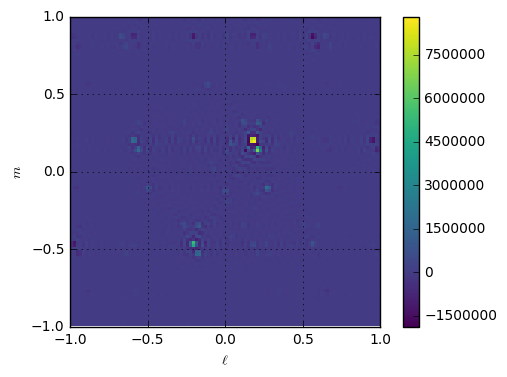

In [3]:
plt.imshow(imgUniform,extent=[-1,1,-1,1],interpolation='nearest',cmap='viridis')
plt.colorbar()
plt.xlabel('$\ell$')
plt.ylabel('$m$')
plt.grid()
plt.savefig('../writeup/image_smin20_217Ant_hex_dant_2_dantpos_3.pdf',bbox_inches='tight')

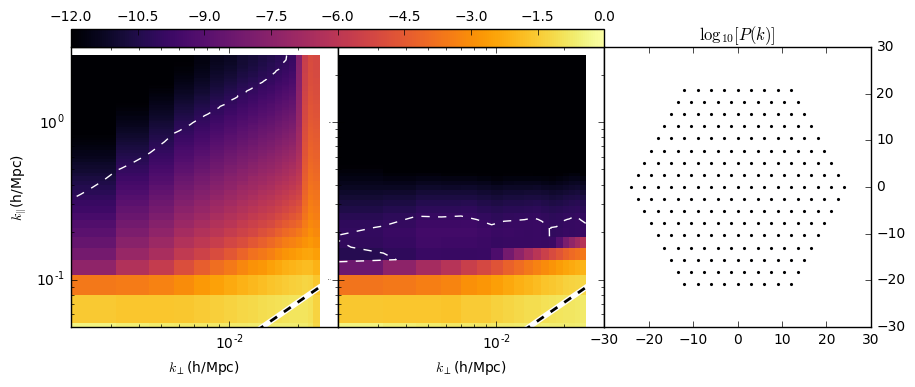

In [4]:
fig=plt.figure()
ax1=fig.add_axes([.1,.1,.8/3,.8])
ax2=fig.add_axes([.8/3.+.1,.1,.8/3.,.8])
ax3=fig.add_axes([2*.8/3.+.1,.1,.8/3.,.8])
cba=fig.add_axes([.1,.9,2*.8/3.,.05])
cubeGrid[cubeGrid==0]=1
kperp_c_grid,kpara_c_grid=np.meshgrid(kperp_c,kpara_c)
wedgeLine_c=kperp_c*cosmology.wedge(cosmology.f2z(simulationDefault.f0))
ax1.pcolor(kperp_c_grid/.68,kpara_c_grid/.68,np.log10(cubeGrid/cubeGrid.max()),cmap='inferno',vmin=-12,vmax=0)
ax1.contour(kperp_c_grid/.68,kpara_c_grid/.68,np.log10(cubeGrid/cubeGrid.max()),levels=[-10],colors=['w'])
ax1.plot(kperp_c/.68,wedgeLine_c/.68,color='w',ls='-',lw=4)
ax1.plot(kperp_c/.68,wedgeLine_c/.68,color='k',ls='--',lw=2)
ax1.set_xlim(2e-3,3e-2)
ax1.set_ylim(5e-2,3e0)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('$k_\\perp$(h/Mpc)')
ax1.set_ylabel('$k_{||}$(h/Mpc)')
ax1.grid(b='on')
ax1.grid(b='on',which='minor')
cubeDGrid[cubeDGrid==0]=1
kperp_dt_grid,kpara_dt_grid=np.meshgrid(kperp_dt,kpara_dt)
wedgeLine_dt=kperp_dt*cosmology.wedge(cosmology.f2z(simulationDefault.f0))
pc=ax2.pcolor(kperp_dt_grid/.68,kpara_dt_grid/.68,np.log10(cubeDGrid/cubeDGrid.max()),cmap='inferno',vmin=-12,vmax=0)
ax2.contour(kperp_c_grid/.68,kpara_c_grid/.68,np.log10(cubeDGrid/cubeDGrid.max()),levels=[-10],colors=['w'])
cb=fig.colorbar(pc,cax=cba,orientation='horizontal')
cba.xaxis.tick_top()
#cba.set_ylabel('$\\log_{10}[P(k)]$')
#cba.yaxis.set_label_position('right')
ax2.plot(kperp_dt/.68,wedgeLine_dt/.68,color='w',ls='-',lw=4)
ax2.plot(kperp_dt/.68,wedgeLine_dt/.68,color='k',ls='--',lw=2)
ax2.set_xlim(2e-3,3e-2)
ax2.set_ylim(5e-2,3e0)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('$k_\\perp$(h/Mpc)')
#ax2.set_ylabel('$k_{||}$(h/Mpc)')
ax2.tick_params('y',labelsize=0)
ax1.grid()
ax1.grid(which='minor')
for posList in simulationDefault.positions:
    ax3.scatter(posList[:,0],posList[:,1],s=np.pi*simulationDefault.dAnt/2**2.)
ax3.yaxis.tick_right()
ax3.set_title('$\\log_{10}[P(k)]$')
plt.gcf().set_size_inches((10,3.5))
plt.savefig('../writeup/power_spectrum_smin20_hex_217_dAnt_2_dAntPos_3.png',bbox_inches='tight')

/Users/aaronew/Python/analysis/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in divide
/Users/aaronew/Python/analysis/lib/python2.7/site-packages/numpy/ma/core.py:3136: ComplexWarning: Casting complex values to real discards the imaginary part
  output = self._data.astype(newtype).view(type(self))


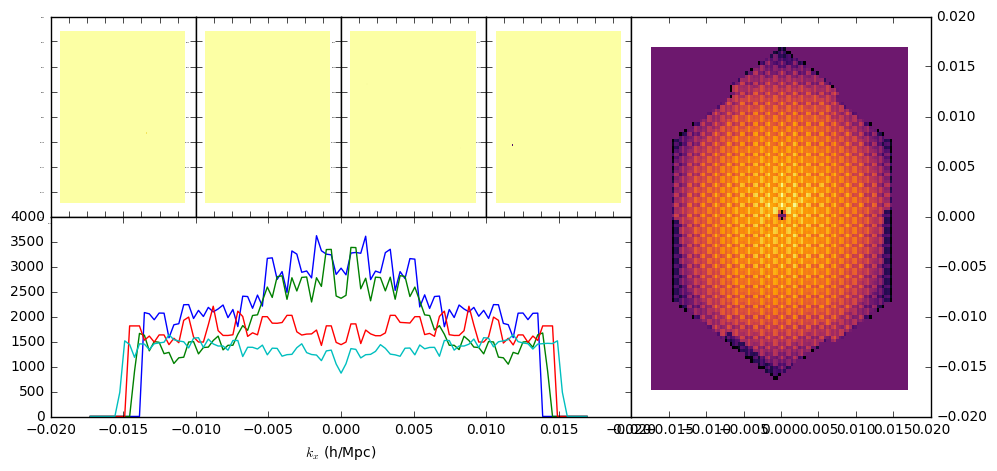

In [5]:
fig=plt.figure()
sFactorX=.66
axarr=[fig.add_axes([.1,.5,.2*sFactorX,.4]),
        fig.add_axes([.1+.2*sFactorX,.5,.2*sFactorX,.4]),
        fig.add_axes([.1+2*.2*sFactorX,.5,.2*sFactorX,.4]),
        fig.add_axes([.1+3*.2*sFactorX,.5,.2*sFactorX,.4])]
laxis=fig.add_axes([.1,.1,.8*sFactorX,.4])
sampleAxis=fig.add_axes([.1+.8*sFactorX,.1,.8*(1-sFactorX),.8])
nf=len(simulationDefault.fAxis)
uA=np.arange(-simulationDefault.gridSize/2,simulationDefault.gridSize/2)*simulationDefault.gridSpacing
kA=cosmology.u2kperp(uA,cosmology.f2z(simulationDefault.f0))
kxGrid,kyGrid=np.meshgrid(kA,kA)

for sliceNum in range(4):
    sliceIndex=(sliceNum*nf)/4
    testSliceL=np.log10(np.abs(np.real(simulationDefault.dataCube[sliceIndex+2,:,:]/simulationDefault.sampleCube[sliceIndex+2,:,:])))
    testSliceL[np.logical_or(np.isnan(testSliceL),np.isinf(testSliceL))]=0.
    axarr[sliceNum].pcolor(kxGrid,kyGrid,testSliceL,vmin=-3,vmax=0,cmap='inferno')
    axarr[sliceNum].tick_params('x',labelsize=0)
    axarr[sliceNum].tick_params('y',labelsize=0)


    avgBox=(np.mean(10**testSliceL[np.logical_and(kA>-.005,kA<=.005),:],axis=0))
    laxis.plot(kA,avgBox)
laxis.set_xlabel('$k_x$ (h/Mpc)')
sSlice=simulationDefault.sampleCube[nf/2,:,:]
sSlice[sSlice==0]=1.
sampleAxis.pcolor(kxGrid,kyGrid,np.log10(sSlice/sSlice.max()),cmap='inferno',vmin=-3,vmax=0)
sampleAxis.yaxis.tick_right()
fig.set_size_inches([11,5])

Try perturbing the positions of the defaultSimulation Cube

In [6]:
simulationDefault.perturbPositions(dAp=simulationDefault.dAntPos*np.sqrt(2.)/2.)
simulationDefault.gridDays(1,2)
kperp_c,kpara_c,cubeGrid=simulationDefault.getCosmologyDCubeGrid()
kperp_dt,kpara_dt,cubeDGrid=simulationDefault.getCosmologyDVisGrid()
imgUniform=simulationDefault.getUniformWeightedImage()[100]

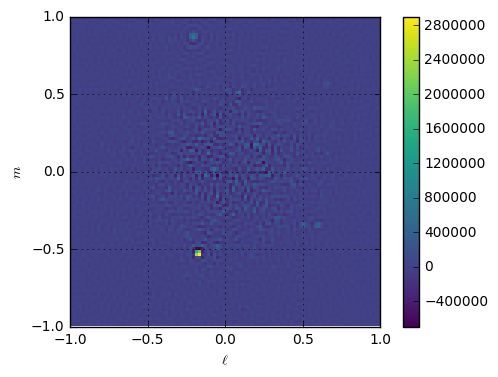

In [7]:
plt.imshow(imgUniform,extent=[-1,1,-1,1],interpolation='nearest',cmap='viridis')
plt.colorbar()
plt.xlabel('$\ell$')
plt.ylabel('$m$')
plt.grid()
plt.savefig('../writeup/image_smin20_217Ant_pHex_1config_dant_2_dantpos_3.pdf',bbox_inches='tight')

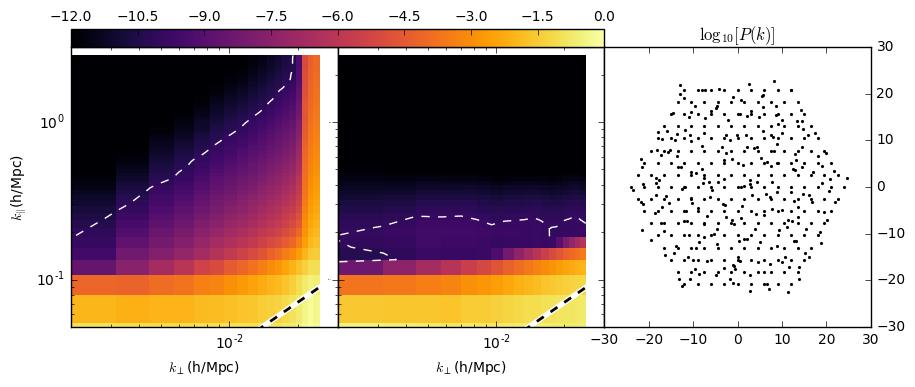

In [8]:
fig=plt.figure()
ax1=fig.add_axes([.1,.1,.8/3,.8])
ax2=fig.add_axes([.8/3.+.1,.1,.8/3.,.8])
ax3=fig.add_axes([2*.8/3.+.1,.1,.8/3.,.8])
cba=fig.add_axes([.1,.9,2*.8/3.,.05])
cubeGrid[cubeGrid==0]=1
kperp_c_grid,kpara_c_grid=np.meshgrid(kperp_c,kpara_c)
wedgeLine_c=kperp_c*cosmology.wedge(cosmology.f2z(simulationDefault.f0))
ax1.pcolor(kperp_c_grid/.68,kpara_c_grid/.68,np.log10(cubeGrid/cubeGrid.max()),cmap='inferno',vmin=-12,vmax=0)
ax1.contour(kperp_c_grid/.68,kpara_c_grid/.68,np.log10(cubeGrid/cubeGrid.max()),levels=[-10],colors=['w'])
ax1.plot(kperp_c/.68,wedgeLine_c/.68,color='w',ls='-',lw=4)
ax1.plot(kperp_c/.68,wedgeLine_c/.68,color='k',ls='--',lw=2)
ax1.set_xlim(2e-3,3e-2)
ax1.set_ylim(5e-2,3e0)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('$k_\\perp$(h/Mpc)')
ax1.set_ylabel('$k_{||}$(h/Mpc)')
ax1.grid(b='on')
ax1.grid(b='on',which='minor')
cubeDGrid[cubeDGrid==0]=1
kperp_dt_grid,kpara_dt_grid=np.meshgrid(kperp_dt,kpara_dt)
wedgeLine_dt=kperp_dt*cosmology.wedge(cosmology.f2z(simulationDefault.f0))
pc=ax2.pcolor(kperp_dt_grid/.68,kpara_dt_grid/.68,np.log10(cubeDGrid/cubeDGrid.max()),cmap='inferno',vmin=-12,vmax=0)
ax2.contour(kperp_c_grid/.68,kpara_c_grid/.68,np.log10(cubeDGrid/cubeDGrid.max()),levels=[-10],colors=['w'])
cb=fig.colorbar(pc,cax=cba,orientation='horizontal')
cba.xaxis.tick_top()
#cba.set_ylabel('$\\log_{10}[P(k)]$')
#cba.yaxis.set_label_position('right')
ax2.plot(kperp_dt/.68,wedgeLine_dt/.68,color='w',ls='-',lw=4)
ax2.plot(kperp_dt/.68,wedgeLine_dt/.68,color='k',ls='--',lw=2)
ax2.set_xlim(2e-3,3e-2)
ax2.set_ylim(5e-2,3e0)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('$k_\\perp$(h/Mpc)')
#ax2.set_ylabel('$k_{||}$(h/Mpc)')
ax2.tick_params('y',labelsize=0)
ax1.grid()
ax1.grid(which='minor')
for posList in simulationDefault.positions:
    ax3.scatter(posList[:,0],posList[:,1],s=np.pi*simulationDefault.dAnt/2**2.)
ax3.yaxis.tick_right()
ax3.set_title('$\\log_{10}[P(k)]$')
plt.gcf().set_size_inches((10,3.5))
plt.savefig('../writeup/power_spectrum_smin20_hex_217_dAnt_2_dAntPos_3_perturbedHex_1config.png',bbox_inches='tight')

/Users/aaronew/Python/analysis/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in divide


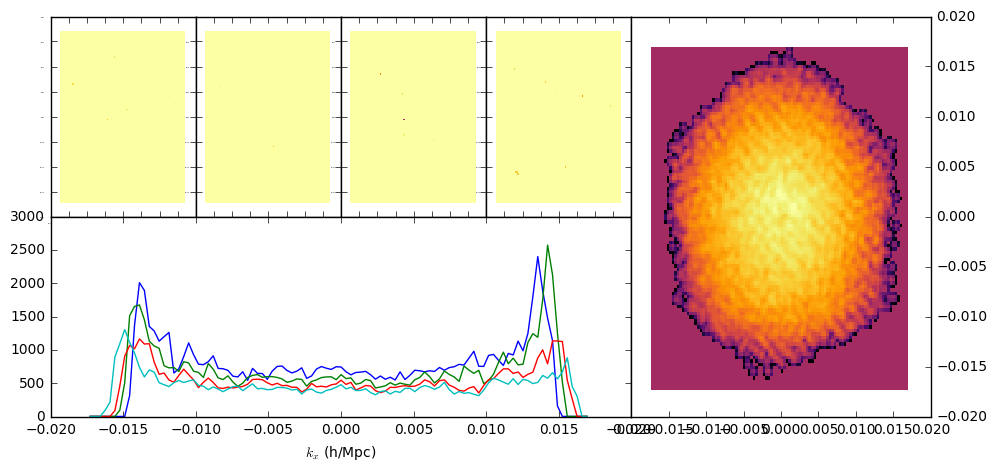

In [9]:
fig=plt.figure()
sFactorX=.66
axarr=[fig.add_axes([.1,.5,.2*sFactorX,.4]),
        fig.add_axes([.1+.2*sFactorX,.5,.2*sFactorX,.4]),
        fig.add_axes([.1+2*.2*sFactorX,.5,.2*sFactorX,.4]),
        fig.add_axes([.1+3*.2*sFactorX,.5,.2*sFactorX,.4])]
laxis=fig.add_axes([.1,.1,.8*sFactorX,.4])
sampleAxis=fig.add_axes([.1+.8*sFactorX,.1,.8*(1-sFactorX),.8])
nf=len(simulationDefault.fAxis)
uA=np.arange(-simulationDefault.gridSize/2,simulationDefault.gridSize/2)*simulationDefault.gridSpacing
kA=cosmology.u2kperp(uA,cosmology.f2z(simulationDefault.f0))
kxGrid,kyGrid=np.meshgrid(kA,kA)

for sliceNum in range(4):
    sliceIndex=(sliceNum*nf)/4
    testSliceL=np.log10(np.abs(np.real(simulationDefault.dataCube[sliceIndex+2,:,:]/simulationDefault.sampleCube[sliceIndex+2,:,:])))
    testSliceL[np.logical_or(np.isnan(testSliceL),np.isinf(testSliceL))]=0.
    axarr[sliceNum].pcolor(kxGrid,kyGrid,testSliceL,vmin=-3,vmax=0,cmap='inferno')
    axarr[sliceNum].tick_params('x',labelsize=0)
    axarr[sliceNum].tick_params('y',labelsize=0)


    avgBox=(np.mean(10**testSliceL[np.logical_and(kA>-.005,kA<=.005),:],axis=0))
    laxis.plot(kA,avgBox)
laxis.set_xlabel('$k_x$ (h/Mpc)')
sSlice=simulationDefault.sampleCube[nf/2,:,:]
sSlice[sSlice==0]=1.
sampleAxis.pcolor(kxGrid,kyGrid,np.log10(sSlice/sSlice.max()),cmap='inferno',vmin=-3,vmax=0)
sampleAxis.yaxis.tick_right()
fig.set_size_inches([11,5])

In [10]:
simulationDefault.perturbPositions(dAp=simulationDefault.dAntPos*np.sqrt(2.)/2.,nDays=10)
simulationDefault.gridDays(startDay=1,endDay=11)
kperp_c,kpara_c,cubeGrid=simulationDefault.getCosmologyDCubeGrid()
kperp_dt,kpara_dt,cubeDGrid=simulationDefault.getCosmologyDVisGrid()
imgUniform=simulationDefault.getUniformWeightedImage()[100]

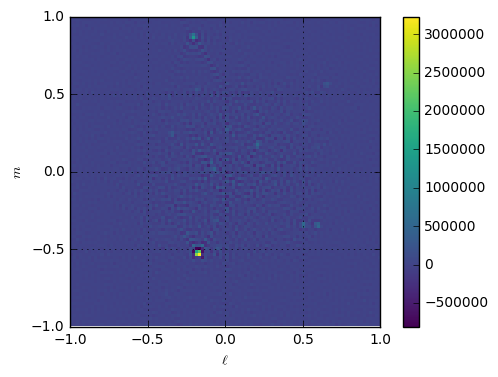

In [11]:
plt.imshow(imgUniform,extent=[-1,1,-1,1],interpolation='nearest',cmap='viridis')
plt.colorbar()
plt.xlabel('$\ell$')
plt.ylabel('$m$')
plt.grid()
plt.savefig('../writeup/image_smin20_217Ant_pHex_10config_dant_2_dantpos_3.pdf',bbox_inches='tight')

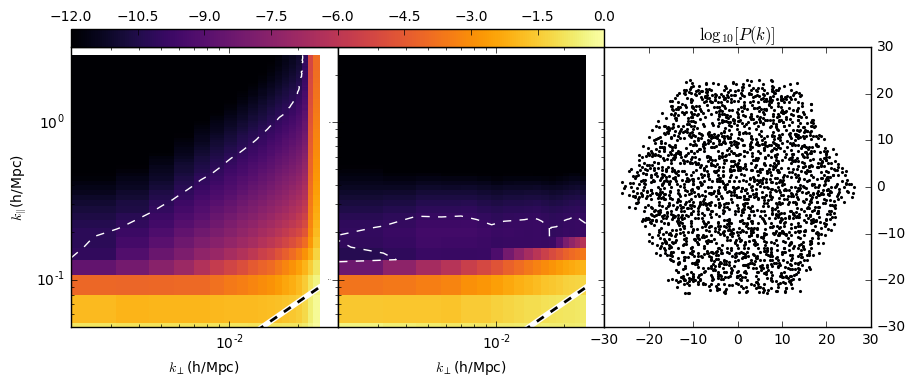

In [12]:
fig=plt.figure()
ax1=fig.add_axes([.1,.1,.8/3,.8])
ax2=fig.add_axes([.8/3.+.1,.1,.8/3.,.8])
ax3=fig.add_axes([2*.8/3.+.1,.1,.8/3.,.8])
cba=fig.add_axes([.1,.9,2*.8/3.,.05])
cubeGrid[cubeGrid==0]=1
kperp_c_grid,kpara_c_grid=np.meshgrid(kperp_c,kpara_c)
wedgeLine_c=kperp_c*cosmology.wedge(cosmology.f2z(simulationDefault.f0))
ax1.pcolor(kperp_c_grid/.68,kpara_c_grid/.68,np.log10(cubeGrid/cubeGrid.max()),cmap='inferno',vmin=-12,vmax=0)
ax1.contour(kperp_c_grid/.68,kpara_c_grid/.68,np.log10(cubeGrid/cubeGrid.max()),levels=[-10],colors=['w'])
ax1.plot(kperp_c/.68,wedgeLine_c/.68,color='w',ls='-',lw=4)
ax1.plot(kperp_c/.68,wedgeLine_c/.68,color='k',ls='--',lw=2)
ax1.set_xlim(2e-3,3e-2)
ax1.set_ylim(5e-2,3e0)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('$k_\\perp$(h/Mpc)')
ax1.set_ylabel('$k_{||}$(h/Mpc)')
ax1.grid(b='on')
ax1.grid(b='on',which='minor')
cubeDGrid[cubeDGrid==0]=1
kperp_dt_grid,kpara_dt_grid=np.meshgrid(kperp_dt,kpara_dt)
wedgeLine_dt=kperp_dt*cosmology.wedge(cosmology.f2z(simulationDefault.f0))
pc=ax2.pcolor(kperp_dt_grid/.68,kpara_dt_grid/.68,np.log10(cubeDGrid/cubeDGrid.max()),cmap='inferno',vmin=-12,vmax=0)
ax2.contour(kperp_c_grid/.68,kpara_c_grid/.68,np.log10(cubeDGrid/cubeDGrid.max()),levels=[-10],colors=['w'])
cb=fig.colorbar(pc,cax=cba,orientation='horizontal')
cba.xaxis.tick_top()
#cba.set_ylabel('$\\log_{10}[P(k)]$')
#cba.yaxis.set_label_position('right')
ax2.plot(kperp_dt/.68,wedgeLine_dt/.68,color='w',ls='-',lw=4)
ax2.plot(kperp_dt/.68,wedgeLine_dt/.68,color='k',ls='--',lw=2)
ax2.set_xlim(2e-3,3e-2)
ax2.set_ylim(5e-2,3e0)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('$k_\\perp$(h/Mpc)')
#ax2.set_ylabel('$k_{||}$(h/Mpc)')
ax2.tick_params('y',labelsize=0)
ax1.grid()
ax1.grid(which='minor')
for posList in simulationDefault.positions:
    ax3.scatter(posList[:,0],posList[:,1],s=np.pi*simulationDefault.dAnt/2**2.)
ax3.yaxis.tick_right()
ax3.set_title('$\\log_{10}[P(k)]$')
plt.gcf().set_size_inches((10,3.5))
plt.savefig('../writeup/power_spectrum_smin20_hex_217_dAnt_2_dAntPos_3_perturbedHex_10config.png',bbox_inches='tight')

/Users/aaronew/Python/analysis/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in divide


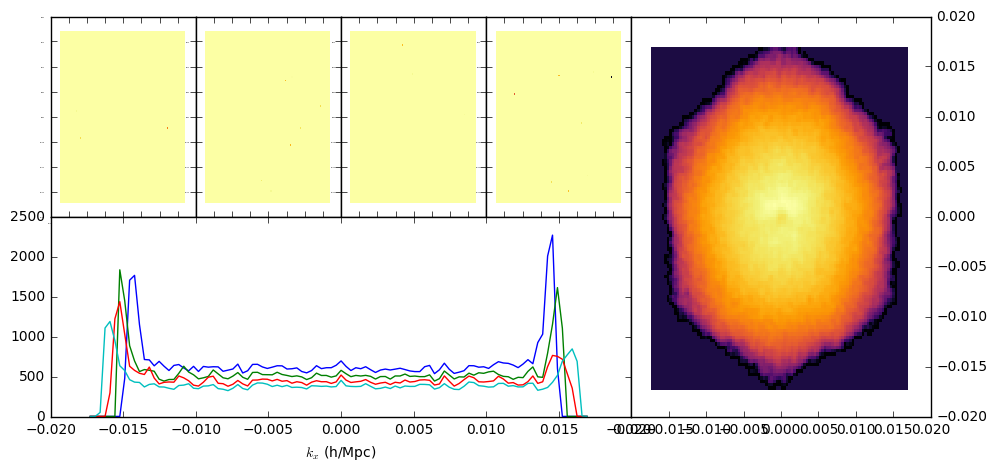

In [13]:
fig=plt.figure()
sFactorX=.66
axarr=[fig.add_axes([.1,.5,.2*sFactorX,.4]),
        fig.add_axes([.1+.2*sFactorX,.5,.2*sFactorX,.4]),
        fig.add_axes([.1+2*.2*sFactorX,.5,.2*sFactorX,.4]),
        fig.add_axes([.1+3*.2*sFactorX,.5,.2*sFactorX,.4])]
laxis=fig.add_axes([.1,.1,.8*sFactorX,.4])
sampleAxis=fig.add_axes([.1+.8*sFactorX,.1,.8*(1-sFactorX),.8])
nf=len(simulationDefault.fAxis)
uA=np.arange(-simulationDefault.gridSize/2,simulationDefault.gridSize/2)*simulationDefault.gridSpacing
kA=cosmology.u2kperp(uA,cosmology.f2z(simulationDefault.f0))
kxGrid,kyGrid=np.meshgrid(kA,kA)

for sliceNum in range(4):
    sliceIndex=(sliceNum*nf)/4
    testSliceL=np.log10(np.abs(np.real(simulationDefault.dataCube[sliceIndex+2,:,:]/simulationDefault.sampleCube[sliceIndex+2,:,:])))
    testSliceL[np.logical_or(np.isnan(testSliceL),np.isinf(testSliceL))]=0.
    axarr[sliceNum].pcolor(kxGrid,kyGrid,testSliceL,vmin=-3,vmax=0,cmap='inferno')
    axarr[sliceNum].tick_params('x',labelsize=0)
    axarr[sliceNum].tick_params('y',labelsize=0)


    avgBox=(np.mean(10**testSliceL[np.logical_and(kA>-.005,kA<=.005),:],axis=0))
    laxis.plot(kA,avgBox)
laxis.set_xlabel('$k_x$ (h/Mpc)')
sSlice=simulationDefault.sampleCube[nf/2,:,:]
sSlice[sSlice==0]=1.
sampleAxis.pcolor(kxGrid,kyGrid,np.log10(sSlice/sSlice.max()),cmap='inferno',vmin=-3,vmax=0)
sampleAxis.yaxis.tick_right()
fig.set_size_inches([11,5])

In [14]:
simulationDefault.perturbPositions(dAp=simulationDefault.dAntPos*np.sqrt(2.)/2.,nDays=100)
simulationDefault.gridDays(startDay=1,endDay=101)
kperp_c,kpara_c,cubeGrid=simulationDefault.getCosmologyDCubeGrid()
kperp_dt,kpara_dt,cubeDGrid=simulationDefault.getCosmologyDVisGrid()

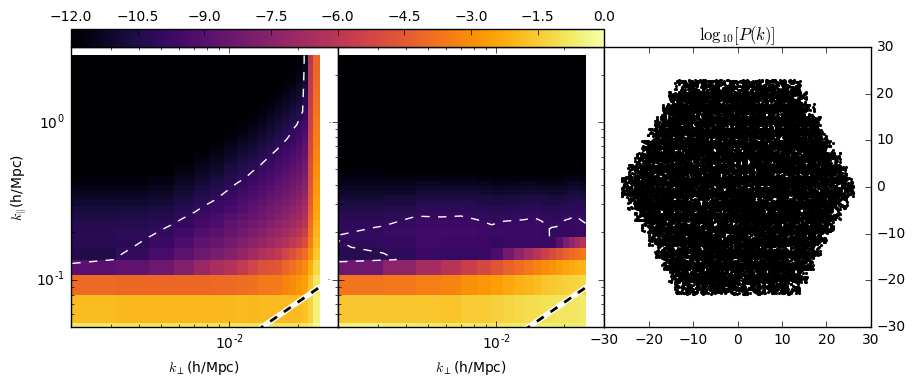

In [15]:
fig=plt.figure()
ax1=fig.add_axes([.1,.1,.8/3,.8])
ax2=fig.add_axes([.8/3.+.1,.1,.8/3.,.8])
ax3=fig.add_axes([2*.8/3.+.1,.1,.8/3.,.8])
cba=fig.add_axes([.1,.9,2*.8/3.,.05])
cubeGrid[cubeGrid==0]=1
kperp_c_grid,kpara_c_grid=np.meshgrid(kperp_c,kpara_c)
wedgeLine_c=kperp_c*cosmology.wedge(cosmology.f2z(simulationDefault.f0))
ax1.pcolor(kperp_c_grid/.68,kpara_c_grid/.68,np.log10(cubeGrid/cubeGrid.max()),cmap='inferno',vmin=-12,vmax=0)
ax1.contour(kperp_c_grid/.68,kpara_c_grid/.68,np.log10(cubeGrid/cubeGrid.max()),levels=[-10],colors=['w'])
ax1.plot(kperp_c/.68,wedgeLine_c/.68,color='w',ls='-',lw=4)
ax1.plot(kperp_c/.68,wedgeLine_c/.68,color='k',ls='--',lw=2)
ax1.set_xlim(2e-3,3e-2)
ax1.set_ylim(5e-2,3e0)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('$k_\\perp$(h/Mpc)')
ax1.set_ylabel('$k_{||}$(h/Mpc)')
ax1.grid(b='on')
ax1.grid(b='on',which='minor')
cubeDGrid[cubeDGrid==0]=1
kperp_dt_grid,kpara_dt_grid=np.meshgrid(kperp_dt,kpara_dt)
wedgeLine_dt=kperp_dt*cosmology.wedge(cosmology.f2z(simulationDefault.f0))
pc=ax2.pcolor(kperp_dt_grid/.68,kpara_dt_grid/.68,np.log10(cubeDGrid/cubeDGrid.max()),cmap='inferno',vmin=-12,vmax=0)
ax2.contour(kperp_c_grid/.68,kpara_c_grid/.68,np.log10(cubeDGrid/cubeDGrid.max()),levels=[-10],colors=['w'])
cb=fig.colorbar(pc,cax=cba,orientation='horizontal')
cba.xaxis.tick_top()
#cba.set_ylabel('$\\log_{10}[P(k)]$')
#cba.yaxis.set_label_position('right')
ax2.plot(kperp_dt/.68,wedgeLine_dt/.68,color='w',ls='-',lw=4)
ax2.plot(kperp_dt/.68,wedgeLine_dt/.68,color='k',ls='--',lw=2)
ax2.set_xlim(2e-3,3e-2)
ax2.set_ylim(5e-2,3e0)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('$k_\\perp$(h/Mpc)')
#ax2.set_ylabel('$k_{||}$(h/Mpc)')
ax2.tick_params('y',labelsize=0)
ax1.grid()
ax1.grid(which='minor')
for posList in simulationDefault.positions:
    ax3.scatter(posList[:,0],posList[:,1],s=np.pi*simulationDefault.dAnt/2**2.)
ax3.yaxis.tick_right()
ax3.set_title('$\\log_{10}[P(k)]$')
plt.gcf().set_size_inches((10,3.5))
plt.savefig('../writeup/power_spectrum_smin20_hex_217_dAnt_2_dAntPos_3_perturbedHex_100config.png',bbox_inches='tight')

/Users/aaronew/Python/analysis/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in divide


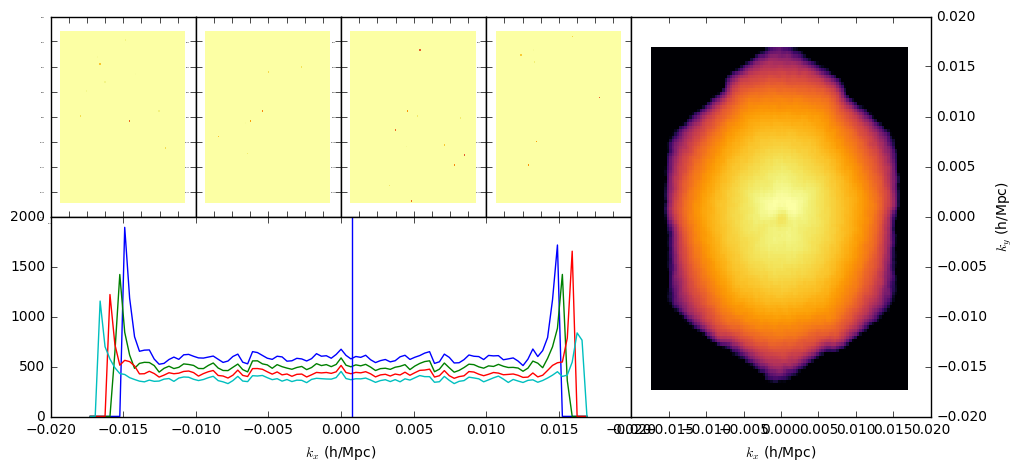

In [16]:
fig=plt.figure()
sFactorX=.66
axarr=[fig.add_axes([.1,.5,.2*sFactorX,.4]),
        fig.add_axes([.1+.2*sFactorX,.5,.2*sFactorX,.4]),
        fig.add_axes([.1+2*.2*sFactorX,.5,.2*sFactorX,.4]),
        fig.add_axes([.1+3*.2*sFactorX,.5,.2*sFactorX,.4])]
laxis=fig.add_axes([.1,.1,.8*sFactorX,.4])
sampleAxis=fig.add_axes([.1+.8*sFactorX,.1,.8*(1-sFactorX),.8])
nf=len(simulationDefault.fAxis)
uA=np.arange(-simulationDefault.gridSize/2,simulationDefault.gridSize/2)*simulationDefault.gridSpacing
kA=cosmology.u2kperp(uA,cosmology.f2z(simulationDefault.f0))
kxGrid,kyGrid=np.meshgrid(kA,kA)


for sliceNum in range(4):
    sliceIndex=(sliceNum*nf)/4
    testSliceL=np.log10(np.abs(np.real(simulationDefault.dataCube[sliceIndex+2,:,:]/simulationDefault.sampleCube[sliceIndex+2,:,:])))
    testSliceL[np.logical_or(np.isnan(testSliceL),np.isinf(testSliceL))]=0.
    axarr[sliceNum].pcolor(kxGrid,kyGrid,testSliceL,vmin=-3,vmax=0,cmap='inferno')
    axarr[sliceNum].tick_params('x',labelsize=0)
    axarr[sliceNum].tick_params('y',labelsize=0)


    avgBox=(np.mean(10**testSliceL[np.logical_and(kA>-.005,kA<=.005),:],axis=0))
    laxis.plot(kA,avgBox)
    #laxis.plot(uA,avgBox)
laxis.set_xlabel('$k_x$ (h/Mpc)')
laxis.axvline(cosmology.u2kperp(1./.9,cosmology.f2z(simulationDefault.f0)))
#laxis.axvline(1/.9)
sSlice=simulationDefault.sampleCube[nf/2,:,:]
sSlice[sSlice==0]=1.
sampleAxis.pcolor(kxGrid,kyGrid,np.log10(sSlice/sSlice.max()),cmap='inferno',vmin=-3,vmax=0)
sampleAxis.yaxis.tick_right()
sampleAxis.set_ylabel('$k_y$ (h/Mpc)')
sampleAxis.set_xlabel('$k_x$ (h/Mpc)')
sampleAxis.yaxis.set_label_position('right')
fig.set_size_inches([11,5])
cubeGrid_100day=cubeGrid

/Users/aaronew/Python/analysis/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in divide
/Users/aaronew/Python/analysis/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in divide
/Users/aaronew/Python/analysis/lib/python2.7/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


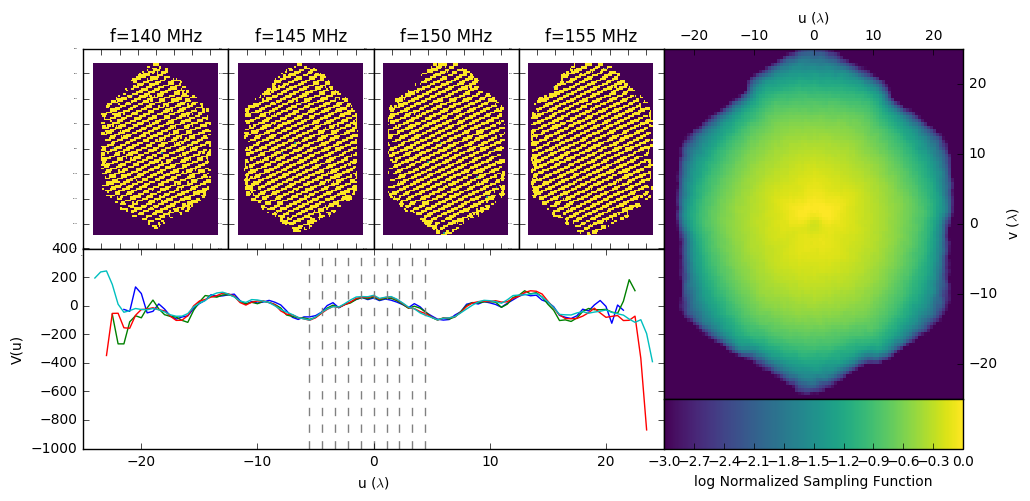

In [17]:
fig=plt.figure()
sFactorX=.66
axarr=[fig.add_axes([.1,.5,.2*sFactorX,.4]),
        fig.add_axes([.1+.2*sFactorX,.5,.2*sFactorX,.4]),
        fig.add_axes([.1+2*.2*sFactorX,.5,.2*sFactorX,.4]),
        fig.add_axes([.1+3*.2*sFactorX,.5,.2*sFactorX,.4])]
laxis=fig.add_axes([.1,.1,.8*sFactorX,.4])
sampleAxis=fig.add_axes([.1+.8*sFactorX,.2,.8*(1-sFactorX),.7])
scbax=fig.add_axes([.1+.8*sFactorX,.1,.8*(1-sFactorX),.1])

nf=len(simulationDefault.fAxis)
uA=np.arange(-simulationDefault.gridSize/2,simulationDefault.gridSize/2)*simulationDefault.gridSpacing
kA=cosmology.u2kperp(uA,cosmology.f2z(simulationDefault.f0))
kxGrid,kyGrid=np.meshgrid(kA,kA)
uGrid,vGrid=np.meshgrid(uA,uA)

for sliceNum in range(4):
    sliceIndex=(sliceNum*nf)/4
    testSliceL=np.log10(np.abs(np.real(simulationDefault.dataCube[sliceIndex+2,:,:]/simulationDefault.sampleCube[sliceIndex+2,:,:])))
    testSlice=np.real(simulationDefault.dataCube[sliceIndex+2,:,:]/simulationDefault.sampleCube[sliceIndex+2,:,:])
    testSliceL[np.logical_or(np.isnan(testSliceL),np.isinf(testSliceL))]=0.
    axarr[sliceNum].pcolor(kxGrid,kyGrid,testSlice,vmin=-1,vmax=1,cmap='viridis')
    axarr[sliceNum].tick_params('x',labelsize=0)
    axarr[sliceNum].tick_params('y',labelsize=0)
    axarr[sliceNum].set_title('f=%d MHz'%(simulationDefault.fAxis[sliceIndex+2]/1e6))

    avgBox=np.mean(testSlice[np.logical_and(kA>-.005,kA<=.005),:],axis=0)
    #laxis.plot(kA,avgBox)
    laxis.plot(uA,avgBox)
laxis.set_xlabel('u ($\\lambda$)')
laxis.set_ylabel('V(u)')
for m in range(-5,5):
    #laxis.axvline(cosmology.u2kperp(m/.9,cosmology.f2z(simulationDefault.f0)),ls='--',color='grey')
    laxis.axvline(m/.9,ls='--',color='grey')
#for m in range(-2,2):
#    laxis.axvline(cosmology.u2kperp(m/(2*(1-.9)),cosmology.f2z(simulationDefault.f0)),ls='--',color='k')
laxis.set_xlim(-25,25)
sSlice=simulationDefault.sampleCube[nf/2,:,:]
sSlice[sSlice==0]=1.
im=sampleAxis.pcolor(uGrid,vGrid,np.log10(sSlice/sSlice.max()),cmap='viridis',vmin=-3,vmax=0)
plt.gcf().colorbar(im,cax=scbax,orientation='horizontal')
scbax.set_xlabel('log Normalized Sampling Function')
sampleAxis.yaxis.tick_right()
sampleAxis.set_ylabel('v ($\\lambda$)')
sampleAxis.set_xlabel('u ($\\lambda$)')
sampleAxis.set_xlim(-25,25)
sampleAxis.set_ylim(-25,25)
sampleAxis.xaxis.tick_top()
sampleAxis.xaxis.set_label_position('top')
sampleAxis.yaxis.set_label_position('right')
fig.set_size_inches([11,5])
plt.savefig('../writeup/visPlot_smin20_perturbHex_100config_dAnt_2_dAntPos_3.png')

compute grids for 1,10,30 days and compare on the same contour plot

In [18]:
simulationDefault.perturbPositions(dAp=simulationDefault.dAntPos*np.sqrt(2.)/2.)
simulationDefault.gridDays(1,2)
kperp_c,kpara_c,cubeGrid_1day=simulationDefault.getCosmologyDCubeGrid()
print '1day done'
simulationDefault.perturbPositions(dAp=simulationDefault.dAntPos*np.sqrt(2.)/2.,nDays=10)
simulationDefault.gridDays(startDay=1,endDay=11)
kperp_c,kpara_c,cubeGrid_10day=simulationDefault.getCosmologyDCubeGrid()
print '10 day done'
simulationDefault.perturbPositions(dAp=simulationDefault.dAntPos*np.sqrt(2.)/2.,nDays=100)
simulationDefault.gridDays(startDay=1,endDay=101)
kperp_c,kpara_c,cubeGrid_100day=simulationDefault.getCosmologyDCubeGrid()
print '100 day done'

1day done
10 day done
100 day done


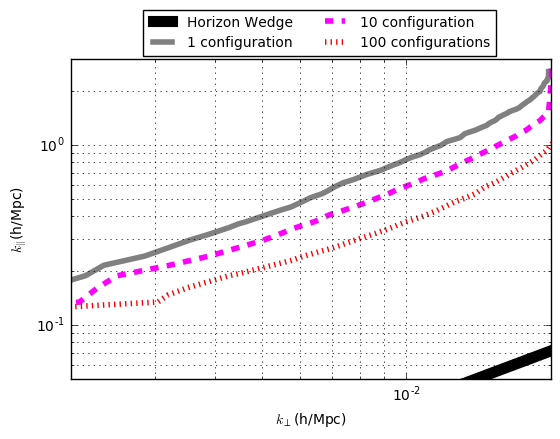

In [19]:
kperp_c_grid,kpara_c_grid=np.meshgrid(kperp_c,kpara_c)
fig=plt.figure()
ax1=fig.add_axes([.1,.1,.8,.8])
cs1=ax1.contour(kperp_c_grid/.68,kpara_c_grid/.68,np.log10(cubeGrid_1day/cubeGrid_1day.max()),levels=[-10],colors=['grey'],linestyles=['-'],labels=['1 day'],linewidths=[4])
cs2=ax1.contour(kperp_c_grid/.68,kpara_c_grid/.68,np.log10(cubeGrid_10day/cubeGrid_10day.max()),levels=[-10],colors=['magenta'],linestyles=['--'],labels=['10 days'],linewidths=[4])
cs3=ax1.contour(kperp_c_grid/.68,kpara_c_grid/.68,np.log10(cubeGrid_100day/cubeGrid_100day.max()),levels=[-10],colors=['r'],linestyles=[':'],labels=['30 days'],linewidths=[4])
cs1.collections[0].set_label('1 configuration')
cs2.collections[0].set_label('10 configuration')
cs3.collections[0].set_label('100 configurations')
ax1.set_xlim(2e-3,2e-2)
ax1.set_ylim(5e-2,3e0)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('$k_\perp$(h/Mpc)')
ax1.set_ylabel('$k_{||}$(h/Mpc)')
plt.grid()
plt.grid(which='minor')
plt.plot(kperp_c/.68,cosmology.wedge(cosmology.f2z(simulationDefault.f0))*kperp_c/.68,color='k',ls='-',lw=8,label='Horizon Wedge')
plt.legend(loc=[.15,1.01],ncol=2,fontsize=10)
plt.savefig('../writeup/wedgeCompare_smin20_217_dAnt_2_dAntPos_3_smin20_p9.pdf',bbox_inches='tight')